In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


# Activate TF2 behavior:
from tensorflow.python import tf2
if not tf2.enabled():
  import tensorflow.compat.v2 as tf
  tf.enable_v2_behavior()
  assert tf2.enabled()

import numpy as np
# import tensorflow as tf

# Set seeds
np.random.seed(10)
# tf.random.set_seed(10)

from tensorflow.keras.layers import Input, Dense, LSTM, Lambda, Dropout, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D

from tensorflow.keras import optimizers, models, regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.regularizers import l1
from tensorflow.keras.utils import plot_model
from keras.losses import mse, binary_crossentropy

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt

mode = 'train'


Using TensorFlow backend.


In [11]:

num_epochs = 100
batch_size = 32 #256
learning_rate = 1e-4 #1e-4
decay_rate = 0.01

latent_dim = 512  
epsilon_mean = 0.1
epsilon_std = 1e-4 #1e-4

names=['0.001.npy','0.001544452104946379.npy','0.0023853323044733007.npy','0.0036840314986403863.npy','0.005689810202763908.npy','0.0087876393444041.npy','0.013572088082974531.npy','0.02096144000826768.npy','0.03237394014347626.npy','0.049999999999999996.npy']


In [35]:
read_data = np.load("./0.001.npy")
read_data.shape

(5, 128, 128)

now we're loading the 10 different numpy files.
./0.001.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.001544452104946379.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.0023853323044733007.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.0036840314986403863.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.005689810202763908.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.0087876393444041.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.013572088082974531.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.02096144000826768.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.03237394014347626.npy has a shape of: 
(5, 128, 128)
now we're loading the 10 different numpy files.
./0.05.npy has 

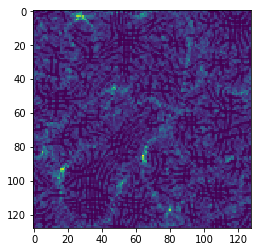

In [52]:


# In[ ]:




for i in range(10): 
    print("now we're loading the 10 different numpy files.")
    print(str("/data/a/cpac/dongx/"+ names[i])+" has a shape of: ")
    
    read_data = np.load(str("/data/a/cpac/dongx/"+ names[i]))
    
    print(read_data.shape)
    
    read_data = read_data + 0.0001   ### setting an offset so that log10 doesn't give -inf.
    
    if i == 0 :
        temp_data=read_data[0:999,:,:]
    
    temp_data = np.concatenate((temp_data, read_data[0:999,:,:]))   #each timestep we take 1000, and append all together.
    #print(read_data[0:999,:,:])
    

# output = (output - output.min() )/(output.max() - output.min())

print("Data loading accomplished. The final dataset has a shape of:")
print(temp_data.shape)
#plt.imshow(temp_data[44])   ### restore this if you'd like to check the dataset plots.

swe_data = np.log10(temp_data)

